__Forward encoding model based on Pim Mostert Decoding toolbox__

Alexis Pérez Bellido (2022)

In [1]:
%matplotlib qt
from scipy.io import loadmat
import numpy as np
import pandas as pd
import mat73
import sys
import inspect #path_fun = inspect.getfile(StratifiedKFold)
import matplotlib.pyplot as plt
#print(sys.path)

Decoding modules

In [2]:
path_utils = '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/Projects/Condcision/Group_level_analyses/Beh_analyses/EEG_condcision_CJ/helper_funcs' 
sys.path.append(path_utils)

In [3]:
path = '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/TOOLBOXES/decoding-toolbox/data/'
path_ori_data = path + 'testdata_orientation.mat'

Loading & preparing orientation data

In [4]:
ori_data = mat73.loadmat(path_ori_data)

In [6]:
Y = ori_data['Y']
X = ori_data['X']
time = ori_data['time']
label = ori_data['label']

In [7]:
phi = X * (180/8);   # Presented orientation in degrees
binned_phi = np.digitize(phi, bins = np.array([  0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5 ]) ) # bins collapsing degrees by similarity

numF = Y.shape[0];
numT = Y.shape[1];
numN = Y.shape[2];

In [8]:
# No time dimension (We only select one point as example)
sel_t = np.where(time >=.2)[0][0];

Creating and saving dat

In [38]:
import DecToolbox as dt
from importlib import reload  # Python 3.4+
reload(dt)

<module 'DecToolbox' from '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/Projects/Condcision/Group_level_analyses/Beh_analyses/EEG_condcision_CJ/DecToolbox.py'>

In [39]:
G = binned_phi.copy() # binning/discritizing orientation dimension to assign a balanced number of stimuli to different dat
CONDS = np.unique(G);
nConds = CONDS.size
nfold = 2
dat = dt.Createdat(G, Y, nfold)

In [43]:
G[dat[0]['train_index']]

array([1, 5, 3, 1, 3, 5, 5, 8, 1, 4, 1, 5, 1, 7, 8, 5, 4, 2, 6, 6, 3, 4,
       8, 2, 3, 5, 6, 4, 4, 3, 6, 3, 7, 1, 3, 7, 8, 6, 6, 4, 5, 2, 2, 2,
       8, 3, 3, 4, 3, 7, 2, 2, 4, 2, 2, 7, 3, 6, 7, 8, 1, 6, 5, 6, 7, 7,
       3, 5, 6, 7, 8, 1, 5, 1, 4, 1, 6, 7, 4, 8, 1, 2, 8, 8, 1, 7, 7, 4,
       5, 2, 8, 5, 6, 3, 2, 7, 3, 3, 6, 4, 1, 8, 1, 7, 2, 4, 8, 2, 8, 5,
       3, 1, 6, 7, 8, 8, 5, 2, 6, 5, 4, 5, 2, 6, 3, 6, 3, 7, 2, 6, 4, 1,
       1, 4, 7, 2, 5, 5, 4, 8, 8, 1, 2, 2, 6, 3, 2, 1, 7, 5, 5, 5, 7, 6,
       1, 3, 6, 3, 6, 7, 5, 8, 3, 5, 8, 7, 2, 4, 1, 4, 1, 8, 7, 8, 5, 6,
       8, 7, 1, 4, 4, 3, 2, 4, 1, 3, 4, 7, 8, 6, 1, 3, 1, 6, 3, 3, 3, 4,
       6, 5, 2, 5, 7, 5, 8, 7, 4, 6, 6, 8, 8, 1, 8, 7, 3, 8, 3, 7, 1, 1,
       8, 4, 7, 7, 7, 2, 7, 5, 3, 8, 2, 8, 4, 5, 4, 1, 1, 3, 6, 5, 1, 3,
       6, 2, 7, 6, 5, 8, 2, 4, 6, 7, 1, 4, 2, 5, 5, 5, 6, 1, 3, 3, 2, 4,
       6, 4, 4, 4, 2, 5, 2, 4, 7, 2, 8, 2, 7, 5, 1, 1, 3, 2, 6, 8, 2, 4,
       6, 1, 2, 7, 4, 3, 3, 2, 4, 5, 7, 8, 5, 2, 2,

In [49]:
dat = dict()
dat['X_train'] = G[ dat[0]['train_index']][:,np.newaxis]
dat['Y_train'] = np.squeeze(Y[:,sel_t, dat[0]['train_index']])
dat['phi_train'] = phi[ dat[0]['train_index']][:,np.newaxis]

dat['X_test'] = G[ dat[0]['test_index']][:,np.newaxis]
dat['Y_test'] = np.squeeze(Y[:,sel_t, dat[0]['test_index']])
dat['phi_test'] = phi[ dat[0]['test_index']][:,np.newaxis]

In [44]:
dat = dict()
dat['X_train'] = G[ dat[0]['train_index']]
dat['Y_train'] = np.squeeze(Y[:,sel_t, dat[0]['train_index']])
dat['phi_train'] = phi[ dat[0]['train_index']]

dat['X_test'] = G[ dat[0]['test_index']]
dat['Y_test'] = np.squeeze(Y[:,sel_t, dat[0]['test_index']])
dat['phi_test'] = phi[ dat[0]['test_index']]

In [87]:
# for comparing this script and the matlab one
import scipy
path_folds_data = '/Users/alex/Library/CloudStorage/OneDrive-UniversitatdeBarcelona/Projects/Condcision/Group_level_analyses/Beh_analyses/EEG_condcision_CJ/folds.mat'

mat = scipy.io.loadmat(path_folds_data)

In [88]:
idx_Train = mat['folds'][0][0].T
idx_Test =mat['folds'][1][0][0].T

In [89]:
#Folds_ori = Folds.copy()
dat = {}
dat['X_train'] = G[idx_Train-1] # -1 to correct for matlab to python indexes
dat['X_test'] = G[idx_Test-1]
dat['Y_train'] = np.squeeze(Y[:,sel_t, idx_Train-1])
dat['Y_test'] = np.squeeze(Y[:,sel_t, idx_Test-1])
dat['phi_train'] = phi[idx_Train-1]
dat['phi_test'] = phi[idx_Test-1]

Create design matrix

In [90]:
numC = 8 # how many channels to use

cfg = dict()
cfg['kappa'] = 4
cfg['NumC'] = numC
cfg['Tuning'] = 'vonmises'#'halfRectCos'
cfg['offset'] = 0

design, sortedesign = dt.stim_features(dat['phi_train'], cfg)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(sortedesign,aspect='auto',interpolation = 'none')

Training encoding model

In [91]:
cfg = dict()
cfg['gamma'] = 0.01
cfg['demean'] = True
cfg['returnPattern'] = True
decoder = dt.train_encoder(design, dat['Y_train'], cfg)

Testing the encoding model

In [92]:
cfg = dict()
cfg['demean'] = 'traindata'
Xhat = dt.test_encoder( decoder, dat['Y_test'], cfg)

__Preparing data for plotting results__

In [93]:
m = np.zeros((numC,numC))
for ic in range(numC):
   m[:,ic] =  np.mean( Xhat[:, np.where(dat['X_test'] == (ic+1))[0]], axis = 1)


Re-alligning predictions for trials with identical orientation

In [94]:
Xhat_centered = 0*Xhat.copy()
for ic in range(numC): # here trials that match similar label orientation are shifted together x positions (np.roll)
    Xhat_centered[:,np.where(dat['X_test'] == (ic+1))] = np.roll(Xhat[:,np.where(dat['X_test'] == (ic+1))], -ic, axis = 0)

In [95]:
m_centered = np.zeros((numC,numC))
for ic in range(numC):
   m_centered[:,ic] =  np.mean( Xhat_centered[:, np.where(dat['X_test'] == (ic+1))[0]], axis = 1)

In [96]:
x_labels = np.array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5])
Xhat_centeredmean = np.mean(Xhat_centered, axis = 1)
Xhat_centeredsem = np.std(m_centered, axis = 1)/Xhat.shape[1]
Xhat_shiftedmean = np.roll(Xhat_centeredmean, 3, axis = 0)
Xhat_shiftedsem = np.roll(Xhat_centeredsem, 3, axis = 0)
x_centeredlabels = np.roll(x_labels,  3, axis = 0)

In [97]:
# Kernel to back project channel outputs to orientation space
kernel = np.exp(1j * (np.linspace(0, numC-1,numC)*(2*np.pi/numC)))
Z = kernel @ Xhat

theta = np.mod(np.angle(Z), 2*np.pi) * (180/np.pi) / 2    # Decoded orientation (retain the module of the complex number)

r = np.mean(np.exp(1j * (theta - dat['phi_test']) * (np.pi/180)*2)) # correlation between decoded and presented orientation
r = np.abs(r) * np.cos(np.angle(r))
r

0.22938762394448162

Getting mean orientation values for each stimulus bin

In [60]:
np.mod(np.angle(np.mean(np.exp(1j * theta[np.where(dat['X_test'] == (ic+1))[0]] * (np.pi/180)*2))), 2*np.pi)

5.206371903207021

# Plotting results

In [44]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.plot(x_labels, m)
ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels.astype(str))
plt.legend(x_labels, loc=3, prop={'size': 6})

In [43]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

plt.plot(x_labels, Xhat_shiftedmean)
plt.fill_between(x_labels, Xhat_shiftedmean-Xhat_shiftedsem, Xhat_shiftedmean+Xhat_shiftedsem)
plt.scatter(x_labels, Xhat_shiftedmean, color = 'red')
ax.set_xticks(x_labels)
ax.set_xticklabels(x_centeredlabels.astype(str))

[Text(0.0, 0, '112.5'),
 Text(22.5, 0, '135.0'),
 Text(45.0, 0, '157.5'),
 Text(67.5, 0, '0.0'),
 Text(90.0, 0, '22.5'),
 Text(112.5, 0, '45.0'),
 Text(135.0, 0, '67.5'),
 Text(157.5, 0, '90.0')]

In [52]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
plt.scatter(x_labels, mtheta, color = 'red')
plt.scatter(dat['phi_test'], theta, s = 1)
ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels.astype(str))


[Text(0.0, 0, '0.0'),
 Text(22.5, 0, '22.5'),
 Text(45.0, 0, '45.0'),
 Text(67.5, 0, '67.5'),
 Text(90.0, 0, '90.0'),
 Text(112.5, 0, '112.5'),
 Text(135.0, 0, '135.0'),
 Text(157.5, 0, '157.5')]

np.mean(np.exp(1j * (theta - dat['phi_test']) * (np.pi/180)*2))

In [501]:
corr_out = np.zeros([NumF,1])
for iY in range(NumF):
    corr_out[[iY]] = np.corrcoef(Ytest[iY,:], Yhat[iY,:])[0,1]



In [503]:
plt.imshow(corr_out, aspect = 'auto', interpolation = 'none')

In [230]:
    trainY = trainY - trainY.mean(axis=1, keepdims=True)
    decoder['dmY'] = trainY.T # save demeaned Y for posterior inspection

In [9]:
#    Created by Alexis Pérez Bellido, 2022

# Creating dat containing test and train indexes
def Createdat(X,nfold):
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=nfold,shuffle=False)
    CrossValIdx = [None] * nfold
    i = 0
    for train_index, test_index  in  skf.split(X = np.zeros(numN), y = X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        CrossValIdx[i] = { 'train_index': train_index, 'test_index': test_index}
        i += 1

    dat = dict()
    dat['X_train'] = G[ CrossValIdx[0]['train_index']][:,np.newaxis]
    dat['Y_train'] = np.squeeze(Y[:,sel_t, CrossValIdx[0]['train_index']])
    dat['phi_train'] = phi[ CrossValIdx[0]['train_index']][:,np.newaxis]

    dat['X_test'] = G[ CrossValIdx[0]['test_index']][:,np.newaxis]
    dat['Y_test'] = np.squeeze(Y[:,sel_t, CrossValIdx[0]['test_index']])
    dat['phi_test'] = phi[ CrossValIdx[0]['test_index']][:,np.newaxis]
    return dat

In [10]:
#   [design] = stim_features(cfg, phi)
#    Returns hypothetical channel responses given a presented orientation, cf. Brouwer & Heeger.
#
#    phi         Array of length N, where N is the number of trials, that specifies the presented
#                orientation on each trial. Orientation is specified in degrees and is expected to
#                have a range of 0-180.
#    cfg         Configuration dictionary that can possess the following fields:
#                ['NumC']                               The number of hypothetical channels C to use. The
#                                                    channels are equally distributed across the circle,
#                                                    starting at 0.
#                ['Tuning']                        The tuning curve according to which the responses
#                                                    are calculated.
#                ['Tuning'] = 'vonMises'           Von Mises curve. Kappa: concentration parameter.
#                ['Tuning'] = 'halfRectCos'        Half-wave rectified cosine. Kappa: power.
#                ['Tuning'] = [function_handle]    User-specified function that can take a matrix as input,
#                                                    containing angles in radians with a range of 0-pi.
#                ['kappa']                              Parameter(s) to be passed on to the tuning curve.
#                ['offset']                            The orientation of the first channel. (default = 0)
#           
#    design      The design matrix, of size C x N, containing the hypothetical channel responses.
#    sortedesign A sorted version of the design matrix, sorted by the presented orientation to improve model visualization.

#    Created by Pim Mostert, 2016 in Matlab. Exported to Python by Alexis Pérez Bellido, 2022

def stim_features(phi, cfg):
    kappa = cfg['kappa']
    NumC = cfg['NumC']
    if 'offset' not in cfg:
        offset = 0
    else:
         offset = cfg['offset']

    sort_idx = phi.argsort(axis = 0)

    NumN = phi.size
    phi = phi - offset
    design = np.arange(0,NumC)[np.newaxis,:].T * np.ones([1, NumN]) * 180/NumC
    design = design - np.ones([NumC,1])*phi.T
    design = design * (np.pi/180) # transforming to radians

    if cfg['Tuning'] == 'halfRectCos':
        fn = lambda x: np.abs(np.cos(x))**kappa
    if cfg['Tuning'] == 'vonmises':
        mu = 0
        fn = lambda x: np.exp(kappa*np.cos(2*x-mu))/(2*np.pi*np.i0(kappa)) 
    
    design = fn(design)
    
    sortedesign = design[:, sort_idx] #np.take_along_axis(design, sort_idx, axis = 1).copy()
    
    return [design , sortedesign]



In [11]:
#   [decoder] = train_encoder(X, Y, cfg)
#    Trains a linear decoder "beamformer style" to optimally recover the latent components as 
#    prescribed in X. Several decoders may be trained indepedently, corresponding to several
#    latent components.
#
#    X           Vector or matrix of size C x N, where C is the number of components and N is
#                the number of trials, that contains the expected/prescribed component activity
#                in the training data.
#    Y           Matrix of size F x N, where F is the number of features, that contains the
#                training data.
#    cfg         Configuration struct that can possess the following fields:
#                ['gamma'] = [scalar]                Shrinkage regularization parameter, with range [0 1]. 
#                                                 No default given.
#                ['returnPattern'] = 'yes' or 'no'   Whether the spatial patterns of the components should
#                                                 be returned. Default = 'no';
#                ['demean'] = 'yes' or 'no'          Whether to demean the data first (per feature, over
#                                                 trials). Default = 'yes';.
#
#    decoder     The (set of) decoder(s), that may be passed on to an appropriate decoding function,
#                e.g. decode_beamformer. It may contain a field .pattern of size C x F
#
#    See also DECODE_BEAMFORMER.

#    Created by Pim Mostert, 2016 in Matlab. Exported to Python by Alexis Pérez Bellido, 2022

def train_encoder(X, Y, cfg): 
    Y = Y.T
    X = X.T
    numC = X.shape[1]
    numF = Y.shape[1]
    decoder = dict()
    gamma = cfg['gamma']

    # demean activity in each trial
    if 'demean' not in cfg:
        cfg['demean'] = True

    if 'returnPattern' not in cfg:
        cfg['returnPattern'] = False

    if  cfg['demean']:
        Ym = Y.mean(axis=0, keepdims=True)
        Y = Y - np.repeat(Ym, axis = 0, repeats = Y.shape[0])
        decoder['dmY'] = Ym.T # save demeaned Y for posterior inspection
    
    if cfg['returnPattern']:
        decoder['pattern'] = np.zeros([numF, numC]) 

    decoder['W'] = np.zeros([numC, numF]) # weights empty matrix


    for ic in range(numC):
        # Estimate leadfield for current channel
        l = ((X[:,ic].T @ X[:,ic])**-1) * (X[:,[ic]].T @ Y) 

        if cfg['returnPattern']:
            decoder['pattern'][:, ic] = l
        # Estimate noise (what is not explained by the regressors coefficients)
        N = Y - X[:,[ic]] * l
        # Estimate noise covariance
        S = np.cov(N,rowvar=False).copy() # rowvar is necessary to get the correct covariance matrix shape
        #  Regularize
        S = (1-gamma)*S + gamma*np.eye(numF) * np.trace(S)/numF #% [w,d] = eig(S);  eigenvalues -> pdiag(d)
        decoder['W'][ic, :] = np.dot(l,np.linalg.inv(S))

    return decoder



In [13]:
def test_encoder( decoder, Y, cfg):
    NumN = Y.shape[1]
    NumC = decoder['W'].shape[0]
    NumF = Y.shape[0]

    # Demean or not demean
    if cfg['demean'] == 'traindata': # demean test data with mean of training data
        Y = Y - np.repeat(decoder['dmY'], axis = 1, repeats = NumN)
    if cfg['demean'] == 'testdata':
        Ym = Y.mean(axis = 0, keepdims=True)
        Y = Y - np.repeat(Ym, axis = 1, repeats = NumN)

    # Decode
    # Inverting the calculated weights for each channel to decode the stimuli

    decoder['iW'] = 0*decoder['W'].copy() # empty array to store the inverted weights

    for ic in range(NumC):
        W = decoder['W'][ic,:]
        decoder['iW'][ic,:] = W / (W @ W.T) # inverting the weights

    Xhat = decoder['iW'] @ Y # Predicting stim based on activity multiplying by the inverted decoder -> Y = WX + N, doing this is like calculating X = Y/N
    return Xhat


In [529]:

plt.imshow(design)

ValueError: operands could not be broadcast together with shapes (8,8) (8,380) 

In [359]:
i = 0
for train_index, test_index  in  skf.split(X = np.zeros(numN), y = X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    CrossValIdx[i] = (train_index, test_index)
    i += 1


TRAIN: [  0   1   2   3   4   5   7   8   9  10  11  13  14  15  16  17  18  19
  20  22  23  24  25  26  27  28  29  30  31  32  33  36  37  38  39  40
  41  42  43  44  45  46  47  49  51  52  53  54  56  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78  80  81  82
  83  84  87  88  89  90  91  92  94  95  96  97 101 102 103 105 107 108
 109 111 112 113 115 116 119 120 121 122 124 126 127 128 129 132 133 134
 135 136 137 138 139 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 157 158 159 161 162 163 164 165 166 168 170 171 172 173 174 175 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 198 199 200 201 202 204 205 206 207 210 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 229 230 231 232 233 234 235 237 238 239
 240 242 243 244 245 248 249 252 253 254 257 258 260 261 262 263 264 265
 266 268 269 270 271 272 273 274 275 276 280 282 283 284 285 287 288 289
 290 291 293 294 295 296 297 299 300 301 303

(array([76., 75., 76.,  0., 75., 77.,  0., 76., 77., 76.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

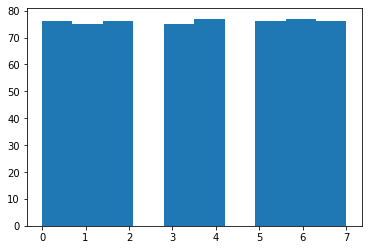

In [322]:
plt.hist(X_train)

In [ ]:

>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 1, 1])
>>> skf = StratifiedKFold(n_splits=2)
>>> skf.get_n_splits(X, y)
2

In [ ]:
# Creating dat containing test and train indexes
nfold = 2

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=nfold,shuffle=False)
CrossValIdx = [None] * nfold
i = 0
for train_index, test_index  in  skf.split(X = np.zeros(numN), y = X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    CrossValIdx[i] = { 'train_index': train_index, 'test_index': test_index}
    i += 1

 X_train = G[ CrossValIdx[0]['train_index']][:,np.newaxis]
 Y_train = np.squeeze(Y[:,sel_t, CrossValIdx[0]['train_index']]).shape
 phi_train = phi[ CrossValIdx[0]['train_index']][:,np.newaxis]

 X_test = G[ CrossValIdx[0]['test_index']][:,np.newaxis]
 Y_test = np.squeeze(Y[:,sel_t, CrossValIdx[0]['test_index']]).shape
 phi_test = phi[ CrossValIdx[0]['test_index']][:,np.newaxis]

In [ ]:

 X_train = G[ CrossValIdx[0]['train_index']][:,np.newaxis]
 Y_train = np.squeeze(Y[:,sel_t, CrossValIdx[0]['train_index']]).shape
 phi_train = phi[ CrossValIdx[0]['train_index']][:,np.newaxis]

 X_test = G[ CrossValIdx[0]['test_index']][:,np.newaxis]
 Y_test = np.squeeze(Y[:,sel_t, CrossValIdx[0]['test_index']]).shape
 phi_test = phi[ CrossValIdx[0]['test_index']][:,np.newaxis]

In [225]:
G[dat[0].astype(int)]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6

In [229]:
dat = [np.array([])]*nfold

for iCond in range(nConds):
    # Find indexes
    indx = np.where(G == CONDS[iCond])[0]
    n_indx = indx.size 
    # Shuffle indexes
    indx = np.random.permutation(indx)
    # Distribute across dat
    nelemxfold = np.floor(indx.size/nfold)
    groupNumber = np.repeat(np.arange(0,nfold), nelemxfold)

    for iFold in range(nfold):
        dat[iFold] = np.append(dat[iFold], indx[np.where(groupNumber == iFold)])

 

In [228]:
 indx[np.where(groupNumber == iFold)]

array([697, 149, 699, 463, 742, 677, 351, 758, 520,  25, 584,  20, 139,
        77,  81, 193,  64,  42, 703, 450, 381, 364, 654, 113, 459, 305,
       746, 192, 260, 590, 147, 556, 551,  45, 481, 541, 236, 488, 519,
       711,  83, 663, 140,   3, 306, 152, 494])

In [227]:
dat

[array([229., 753., 264., 389., 111., 482., 376., 371., 107., 122., 591.,
        289., 570., 667., 658., 335., 698., 356., 690., 721., 737., 245.,
        639., 391., 212., 527., 141., 329., 511., 752., 713.,   1., 759.,
          7., 230., 413., 440., 708., 295., 598., 224., 521.,  47., 747.,
        615., 480., 745., 384.,  91., 497., 201., 668.,  41., 474., 431.,
        522., 200., 231., 128., 729., 715.,  50.,  86., 515., 422.,  49.,
        244.,  23., 634., 353., 680., 661., 562.,  76., 673., 623., 287.,
        605., 185., 744., 423., 266., 650., 689., 580., 225., 484., 164.,
        679., 312., 263.,  78., 716., 347., 446., 235., 688., 135., 672.,
        608., 537., 561., 378., 341., 576., 348.,  63., 565.,  75., 596.,
        617., 575., 286.,  65., 362.,  16., 400., 311., 199., 660., 425.,
        109., 726., 490., 404., 571., 426., 124.,  21., 741., 409., 621.,
        340., 346., 134., 683., 105., 345.,  33.,  67., 232., 401., 665.,
        651., 647., 485., 518., 643., 

(array([95., 94., 95.,  0., 94., 96.,  0., 95., 96., 95.]),
 array([  0.  ,  15.75,  31.5 ,  47.25,  63.  ,  78.75,  94.5 , 110.25,
        126.  , 141.75, 157.5 ]),
 <BarContainer object of 10 artists>)

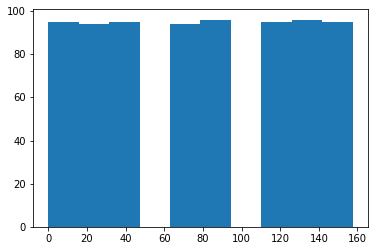

In [39]:
plt.hist(phi)

In [29]:
nfold = 2

In [42]:
np.asarray(time >=.2).nonzero()

(array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
        185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210]),)

120